In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
from datetime import datetime as dt,timedelta

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(engine,reflect=True)

In [25]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
measurement=base.classes.measurement
station=base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [28]:
connection=engine.connect()

In [29]:
recent_date=session.query(measurement.date)

In [30]:
# Find the most recent date in the data set.
recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date[0]

'2017-08-23'

Text(0.5, 0, 'Date')

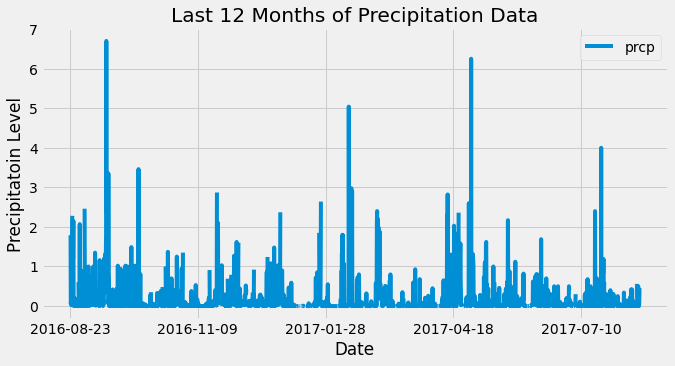

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

#Convert date from string to datetime (strp method)
lastyr_date=dt.strptime(recent_date[0],'%Y-%m-%d')
lastyr_date=lastyr_date-timedelta(days=365)
#Convert date from datetime back to string (strf method)
lastyr_date=lastyr_date.strftime('%Y-%m-%d')
lastyr_date

# Perform a query to retrieve the date and precipitation scores
measurement_query=session.query(measurement.date,measurement.prcp).filter(measurement.date>=lastyr_date).all()
measurement_query

# Save the query results as a Pandas DataFrame and set the index to the date column
query_results_df=pd.DataFrame(measurement_query)
query_results_df.set_index('date',inplace=True)
query_results_df

# Sort the dataframe by date
query_results_df.sort_index(inplace=True)
query_results_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
query_results_df.plot(figsize=(10,5))
plt.title('Last 12 Months of Precipitation Data')
plt.ylabel('Precipitatoin Level')
plt.xlabel('Date')


In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_results_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
station=session.query(func.count(station.id)).all()
station

[(9)]

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations=session.query(measurement.station,func.count(measurement.station)).\
order_by(func.count(measurement.station).desc()).\
group_by(measurement.station).\
all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [35]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_num= 'USC00519281'
session.query(func.min(measurement.tobs),
              func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station==station_num).all()

             

[(54.0, 85.0, 71.66378066378067)]

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yearly_data=session.query(measurement.date,measurement.tobs).\
filter(measurement.station== 'USC00519281').\
filter(measurement.date>lastyr_date).all()
yearly_data[:5]

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0)]

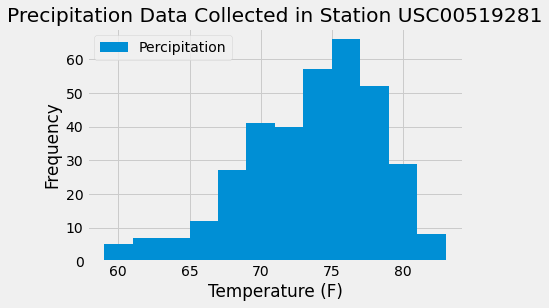

In [38]:
final_df=pd.DataFrame(yearly_data)
final_df.plot(kind="hist",bins=12);
plt.title("Precipitation Data Collected in Station USC00519281")
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.legend(['Percipitation'])

# Close session

In [ ]:
# Close Session
session.close()